In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('corr.csv', delim_whitespace=True)
# raw energy
formation_energy = df.loc[:,"formation_energy"]
# full corr matrix
corr_full = df.loc[:,"corr(0)":"corr(37)"] 
# drop point corr functions
corr = corr_full.drop(["corr(1)", "corr(2)", "corr(3)"], axis=1)

# calculate and store the eci
_eci = np.dot(np.linalg.pinv(corr), formation_energy)
eci = pd.DataFrame(data=_eci, index=corr.columns)
eci.columns = ['pinv']

RMS =  8.7 meV


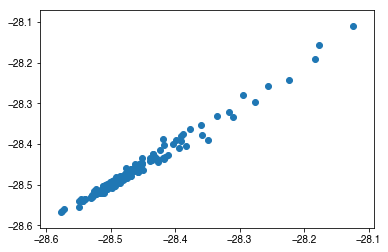

In [3]:
# backtest
def rms(x):
    return np.sqrt(x.dot(x)/x.size)

formation_energy_predict = np.dot(corr, eci).flatten()
print("RMS = {0:4.1f} meV".format(rms(formation_energy - formation_energy_predict)*1000))
plt.scatter(formation_energy, formation_energy_predict);

RMS =  9.1 meV


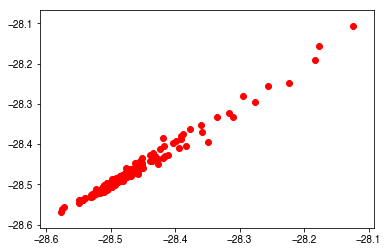

In [4]:
# predictions from casm

df2 = pd.read_csv('formation_energy.csv', delim_whitespace=True)
print("RMS = {0:4.1f} meV".format(rms(df2.formation_energy - df2.clex)*1000))
plt.scatter(df2.formation_energy, df2.clex, c='r');

In [17]:
# ECIs from casm
eci_casm = pd.read_json('eci.json').loc[:,'eci']
_eci2= np.zeros(38)
for i in eci_casm.index:
    _eci2[eci_casm[i][0]] = eci_casm[i][1]
_eci2 = np.delete(_eci2, [1,2,3])
    
# compare ECIs (pinv vs. casm genetic algorithm)
eci2 = eci
eci2.loc[:,'casm'] = pd.Series(_eci2, index=eci.index)
display(eci2)

pinv       casm
corr(0)  -28.891064 -28.890857
corr(4)    0.641466   0.637879
corr(5)    0.638452   0.629917
corr(6)    0.637336   0.641533
corr(7)    0.158382   0.147344
corr(8)    0.104578   0.128435
corr(9)    0.114045   0.112461
corr(10)   0.148715   0.151511
corr(11)   0.149501   0.149912
corr(12)   0.135063   0.133992
corr(13)   0.170360   0.171115
corr(14)   0.174474   0.171213
corr(15)   0.159385   0.161088
corr(16)   0.175166   0.173753
corr(17)   0.152201   0.152686
corr(18)   0.125711   0.120388
corr(19)   0.067499   0.064920
corr(20)   0.038957   0.038981
corr(21)   0.066280   0.065720
corr(22)   0.052770   0.054381
corr(23)   0.044887   0.043975
corr(24)   0.042987   0.035517
corr(25)   0.034088   0.036783
corr(26)   0.046466   0.054387
corr(27)   0.013838   0.032415
corr(28)   0.016604   0.000000
corr(29)  -0.011475   0.000000
corr(30)  -0.085071  -0.089413
corr(31)  -0.048780   0.000000
corr(32)  -0.000383   0.000000
corr(33)   0.005265   0.000000
corr(34)   0.040238   0.000000
corr(35)  -0.010955   0.000000
corr(36)   0.051862   0.000000
corr(37)  -0.023077   0.000000